<a href="https://colab.research.google.com/github/asribavan/cind820---capstone-project/blob/main/Final_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

# Identify datafiles on Google Collab

In [ ]:
import os
print(os.listdir("/content/sample_data"))

['README.md', 'anscombe.json', 'yelp_academic_dataset_business.json', 'mnist_train_small.csv', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_test.csv']


# Explore "Yelp Business JSON"

In [ ]:
users = []
with open("/content/sample_data/yelp_academic_dataset_business.json") as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
yelp_business = pd.DataFrame(users)
yelp_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
print(yelp_business.shape)

(100000, 14)


In [ ]:
yelp_business.stars.describe()

count    100000.000000
mean          3.597235
std           0.974157
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

In [ ]:
yelp_business.review_count.describe()

count    100000.000000
mean         44.797370
std         115.331887
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        6093.000000
Name: review_count, dtype: float64

In [ ]:
yelp_business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes       9085
categories         69
hours           15436
dtype: int64

# Explore "Yelp Review JSON"

In [ ]:
with open('/content/drive/MyDrive/yelp_academic_dataset_review.json.zip', 'rb') as f:
  contents = f.read()

In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = "/content/drive/MyDrive/yelp_academic_dataset_review.json.zip"

In [ ]:
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
yelp_academic_dataset_review.json              2022-01-19 17:51:40   5341868833
__MACOSX/._yelp_academic_dataset_review.json   2022-01-19 17:51:40          312
Extracting all the files now...
Done!


In [ ]:
for info in zip.infolist():
  print(info.filename)

yelp_academic_dataset_review.json
__MACOSX/._yelp_academic_dataset_review.json


In [ ]:
users = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
yelp_review = pd.DataFrame(users)
yelp_review.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
yelp_review.shape

(100000, 9)

In [ ]:
yelp_review.stars.describe()

count    100000.000000
mean          3.842910
std           1.354729
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [ ]:
yelp_review.isnull()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [ ]:
yelp_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
yelp = yelp_review.drop(['business_id', 'review_id','user_id', 'date'], axis=1)
yelp.head(5)

,stars,useful,funny,cool,text
0,3.0,0,0,0,"If you decide to eat here, just be aware it is..."
1,5.0,1,0,1,I've taken a lot of spin classes over the year...
2,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...


In [ ]:
review_stars = yelp['stars'].value_counts()
review_stars_percent = review_stars.apply(lambda i : i / len(yelp) * 100)
review_stars_percent

5.0    44.392
4.0    25.337
3.0    11.362
1.0    10.921
2.0     7.988
Name: stars, dtype: float64

When looking at the number of reviews for each star rating, it is clear that approximately 44% of the users give 5-star and approximately 25% give 4-star ratings. This determines that around 69% of the people visiting the businesses are satisfied with the service. 

The third and fourth highest rankings are 3-stars and 1-star, which makes sense as users rate their experiences either postive or negative, with the occasional neutral. 





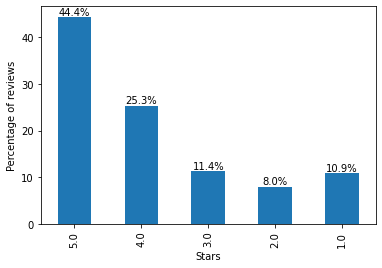

In [ ]:
ax = review_stars_percent.sort_index(ascending=False).plot(kind ='bar')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylabel('Percentage of reviews')
plt.xlabel('Stars');

Text(0, 0.5, 'Count')

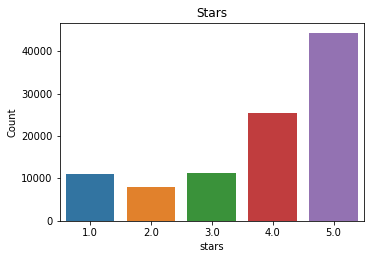

In [ ]:
fig = plt.figure(figsize=(12,8))
axes_a = plt.subplot(2,2,1)
axes_a = sns.countplot(x='stars', data=yelp)
axes_a.set_title('Stars')
axes_a.set_ylabel('Count')

Text(0, 0.5, 'Count')

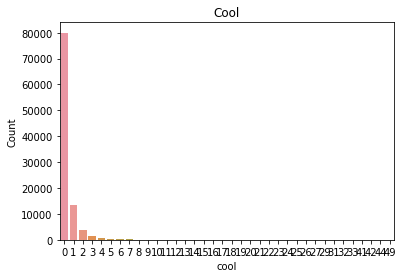

In [ ]:
axes_b = plt.subplot(1,1,1)
axes_b = sns.countplot(x='cool', data=yelp)
axes_b.set_title('Cool')
axes_b.set_ylabel('Count')

Text(0, 0.5, 'Count')

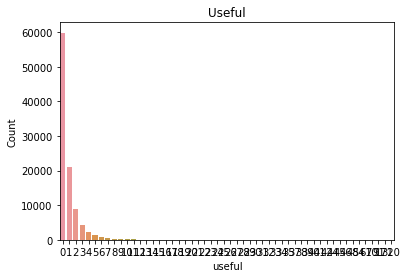

In [ ]:
axes_c = plt.subplot(1,1,1)
axes_c = sns.countplot(x='useful', data=yelp)
axes_c.set_title('Useful')
axes_c.set_ylabel('Count')

Text(0, 0.5, 'Count')

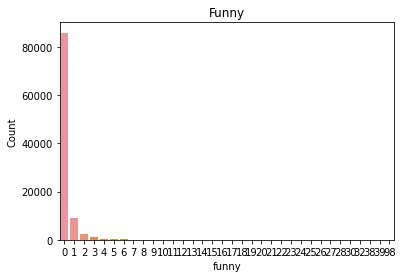

In [ ]:
axes_d = plt.subplot(1,1,1)
axes_d = sns.countplot(x='funny', data=yelp)
axes_d.set_title('Funny')
axes_d.set_ylabel('Count')

In [ ]:
yelp['Text Length'] = yelp['text'].apply(len)
yelp.head(5)

,stars,useful,funny,cool,text,Text Length
0,3.0,0,0,0,"If you decide to eat here, just be aware it is...",513
1,5.0,1,0,1,I've taken a lot of spin classes over the year...,829
2,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,339
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",243
4,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,534


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Text Length Distribution')

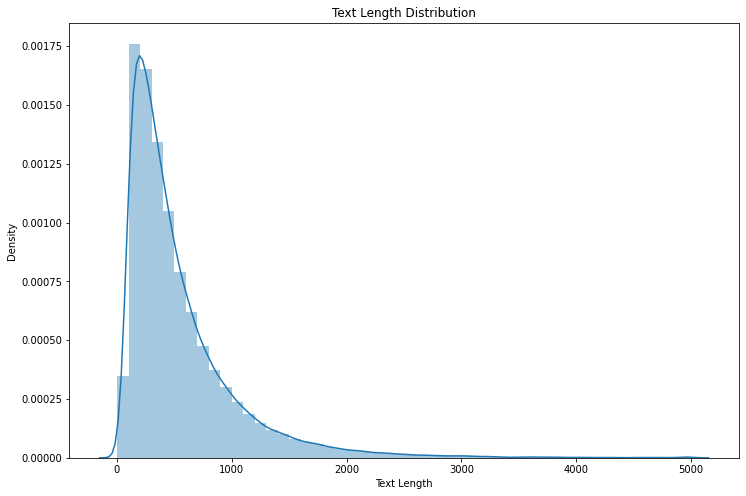

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.distplot(yelp['Text Length'], kde=True, bins=50)
plt.title('Text Length Distribution')

Text(0.5, 1.0, 'Heatmap of Variables')

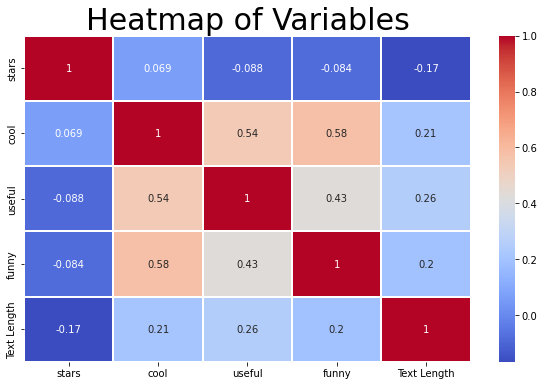

In [ ]:
yelp_cor = yelp[['stars', 'cool', 'useful', 'funny', 'Text Length']].corr()

fig = plt.figure(figsize=(10,6))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

The heatmap above displays that there is no visible correlation between Stars and the other variables in the dataset.

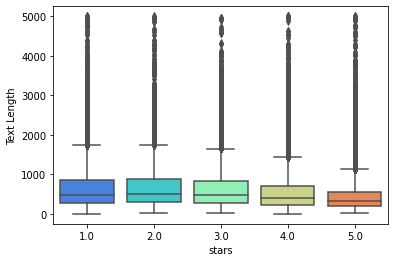

In [ ]:
sns.boxplot(x='stars', y='Text Length', data= yelp, palette='rainbow')

In [ ]:
available_reviews = yelp.query("useful > 0 and cool > 0 and funny > 0")
print("Number of available reviews: ", len(available_reviews))

Number of available reviews:  7810


The reviews dataframe has three columns to differentiate the user's feelings in their respective reviews:

1. Useful
2. Cool
3. Funny

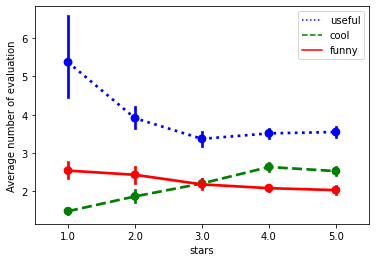

In [ ]:
import matplotlib.lines as mlines
sns.pointplot(x = 'stars', y = 'useful', data = available_reviews, color="blue", linestyles='dotted')
sns.pointplot(x = 'stars', y = 'cool', data = available_reviews, color="green", linestyles='--')
sns.pointplot(x = 'stars', y = 'funny', data = available_reviews, color="red")
lg1 = mlines.Line2D([], [], color='blue', label='useful', linestyle='dotted')
lg2 = mlines.Line2D([], [], color='green', label='cool', linestyle='--')
lg3 = mlines.Line2D([], [], color='red', label='funny')
plt.ylabel('Average number of evaluation')
plt.legend(handles=[lg1, lg2, lg3]);

In the plot above, we can see that reviews deemed useful is greater than cool or funny. It is evident that reviews voted useful are mostly the lowest rated ones. People feel that those low rated reviews are more helpful and potentially more reliable, since they reveal and offer more accurate information about that particular business. 

For reviews voted funny, its as simple as: the higher the star-rating is, the less funny. 

For reviews voted cool, it can also be understood as another way for people to say that they agree with that review of the business.  

In [ ]:
stval = yelp.groupby('stars').mean()
stval

,useful,funny,cool,Text Length
stars,,,,
1.0,1.436132,0.438421,0.146598,673.723652
2.0,1.130946,0.374311,0.221082,685.536680
3.0,0.839289,0.295635,0.308308,647.486270
4.0,0.846904,0.253069,0.450882,561.580100
5.0,0.770094,0.184020,0.369639,460.094972


In [ ]:
stval.corr()

,useful,funny,cool,Text Length
useful,1.000000,0.939522,-0.882668,0.698776
funny,0.939522,1.000000,-0.882283,0.901239
cool,-0.882668,-0.882283,1.000000,-0.730826
Text Length,0.698776,0.901239,-0.730826,1.000000


We can see that there is a negative correlation between Cool & Useful, Cool & Funny and Cool & Length. It can be determined that the cool rating does not have a significant impact and the according reviews are kept short. 


However, there is a positive correlation between Funny & Useful, Funny & Length and Useful & Length. Thus, we can determine that the longer reviews tend to be funny and useful.

# Classifying and splitting the dataset into 2 groups, Reviews and Stars

In [ ]:
yelp_text = yelp[['stars', 'text']]
yelp_text.head()

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...


In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_punc_stopword(text):
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['text'] = yelp_text_allstars['text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

stars    100000
text     100000
dtype: int64

In [ ]:
yelp_text_stars1 = yelp_text[yelp_text['stars']==1]
yelp_text_stars1['text'] = yelp_text_stars1['text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

<ipython-input-45-f029e045176a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_text_stars1['text'] = yelp_text_stars1['text'].apply(remove_punc_stopword)


stars    10921
text     10921
dtype: int64

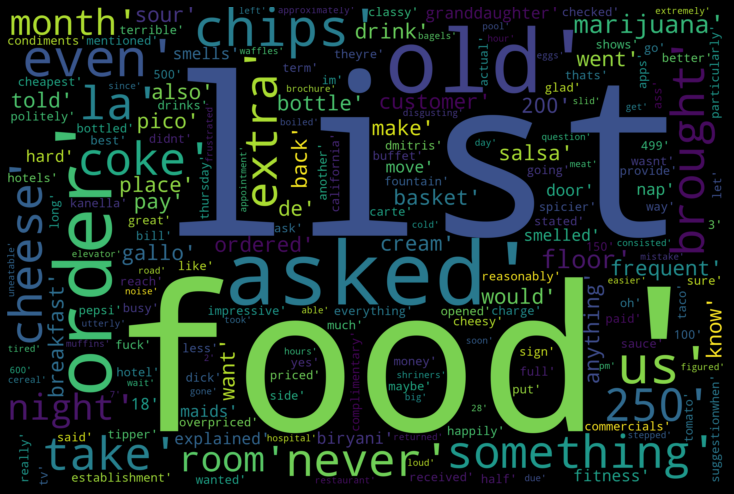

In [ ]:
yelp_stars1_text = yelp_text_stars1['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
yelp_text_stars5 = yelp_text[yelp_text['stars']==5]
yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

<ipython-input-47-d5f4d09a5cb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)


stars    44392
text     44392
dtype: int64

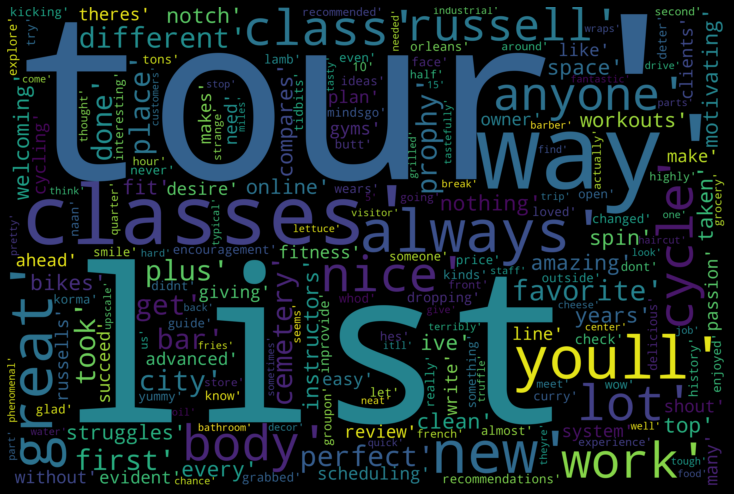

In [ ]:
yelp_stars5_text = yelp_text_stars5['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [69]:
data_classes = yelp[(yelp['stars']==1) | (yelp['stars']==3) | (yelp['stars']==5)]
data_classes.head(5)

,stars,useful,funny,cool,text,Text Length
0,3.0,0,0,0,"If you decide to eat here, just be aware it is...",513
1,5.0,1,0,1,I've taken a lot of spin classes over the year...,829
2,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,339
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",243
5,1.0,1,2,1,I am a long term frequent customer of this est...,341


In [70]:
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

0    If you decide to eat here, just be aware it is...
1    I've taken a lot of spin classes over the year...
2    Family diner. Had the buffet. Eclectic assortm...
3    Wow!  Yummy, different,  delicious.   Our favo...
5    I am a long term frequent customer of this est...
Name: text, dtype: object
0    3.0
1    5.0
2    3.0
3    5.0
5    1.0
Name: stars, dtype: float64


In [71]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [72]:
vocab = CountVectorizer(analyzer=text_process).fit(x)

In [73]:
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)


print("Getting the words back:")
print(vocab.get_feature_names()[19648])
print(vocab.get_feature_names()[10643])

97469
If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.
  (0, 1110)	1
  (0, 23793)	1
  (0, 39365)	1
  (0, 40699)	1
  (0, 41039)	1
  (0, 42070)	1
  (0, 47907)	1
  (0, 50849)	1
  (0, 51951)	1
  (0, 52806)	1
  (0, 53799)	1
  (0, 54474)	1
  (0, 55567)	1
  (0, 55584)	1
  (0, 57469)	1
  (0, 59658)	1
  (0, 59704)	1
  (0, 62825)	1
  (0, 67134)	1
  (0, 67556)	1
  (0, 67652)	2
  (0, 68633)	1
  (0, 71056)	1
  (0, 71732)	1
  (0, 73612)	1
  (0, 73694)	1
  (0, 76856)	1
  (0, 79091)	1
  (0, 80995)	1
  (0, 86778)	1
  (0, 89378)	1
  (0, 89403)	1
 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
x = vocab.transform(x)
print("Shape of the sparse matrix: ", x.shape)

print("Non-Zero occurences: ",x.nnz)

density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (66675, 97469)
Non-Zero occurences:  2927296
Density of the matrix =  0.04504401605228252


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [76]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[1739  369  123]
 [ 250 1417  605]
 [ 270  350 8212]]
Score: 85.25
Classification Report:               precision    recall  f1-score   support

         1.0       0.77      0.78      0.77      2231
         3.0       0.66      0.62      0.64      2272
         5.0       0.92      0.93      0.92      8832

    accuracy                           0.85     13335
   macro avg       0.78      0.78      0.78     13335
weighted avg       0.85      0.85      0.85     13335



Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[1316   76  839]
 [ 148  407 1717]
 [  26   21 8785]]
Score: 78.8
Classification Report:               precision    recall  f1-score   support

         1.0       0.88      0.59      0.71      2231
         3.0       0.81      0.18      0.29      2272
         5.0       0.77      0.99      0.87      8832

    accuracy                           0.79     13335
   macro avg       0.82      0.59      0.62     13335
weighted avg       0.80      0.79      0.75     13335



Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[1325  363  543]
 [ 364  949  959]
 [ 413  759 7660]]
Score: 74.5
Classification Report:               precision    recall  f1-score   support

         1.0       0.63      0.59      0.61      2231
         3.0       0.46      0.42      0.44      2272
         5.0       0.84      0.87      0.85      8832

    accuracy                           0.74     13335
   macro avg       0.64      0.63      0.63     13335
weighted avg       0.74      0.74      0.74     13335



K-Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 578   50 1603]
 [  99  118 2055]
 [ 102   42 8688]]
Score:  70.37
Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.26      0.38      2231
         3.0       0.56      0.05      0.10      2272
         5.0       0.70      0.98      0.82      8832

    accuracy                           0.70     13335
   macro avg       0.67      0.43      0.43     13335
weighted avg       0.69      0.70      0.62     13335



Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

In [ ]:
count = data['stars'].value_counts()
print(count)

##TF-IDF

In [57]:
X = yelp['text']
y = yelp['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
34,0.1,34,0.8878


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_test_pred = mnb.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         1.0       0.61      0.70      0.65      1131
         2.0       0.38      0.25      0.30       779
         3.0       0.39      0.33      0.36      1122
         4.0       0.47      0.56      0.51      2529
         5.0       0.77      0.73      0.75      4439

    accuracy                           0.60     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.60      0.60      0.60     10000



In [59]:
tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)

grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
5,0.1,5,2.4879


In [62]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

X = yelp['text']
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.22      0.35      1091
         2.0       0.00      0.00      0.00       780
         3.0       0.33      0.00      0.00      1149
         4.0       0.28      0.07      0.12      2522
         5.0       0.49      0.99      0.66      4458

    accuracy                           0.49     10000
   macro avg       0.39      0.26      0.22     10000
weighted avg       0.42      0.49      0.36     10000



In [63]:
yelp_1 = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_1['text']
y = yelp_1['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
0,0.1,0,0.720174


In [64]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('classifier', MultinomialNB())])

X = yelp_1['text']
y = yelp_1['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         1.0       0.85      0.90      0.87      1057
         5.0       0.98      0.96      0.97      4475

    accuracy                           0.95      5532
   macro avg       0.91      0.93      0.92      5532
weighted avg       0.95      0.95      0.95      5532

